In [8]:
import pandas as pd
#pd.DataFrame = "MD_agric_exam-4313 (1).csv"
df =pd.read_csv("MD_agric_exam-4313 (1).csv")

In [9]:
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [10]:
df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


In [13]:
import pandas as pd
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
num_unique_crop = data['Crop_type'].nunique()
print("Number of unique crop types:", num_unique_crop)

Number of unique crop types: 8


In [ ]:
import pandas as pd
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
print(data.columns)

Index(['Field_ID', 'Elevation', 'Rainfall', 'Min_temperature_C',
       'Max_temperature_C', 'pH', 'Pollution_level', 'Plot_size',
       'Annual_yield', 'Crop_type'],
      dtype='object')


In [ ]:
import pandas as pd
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
num_unique_crops = data['Crop_type'].nunique()
print("Number of unique crop types:", num_unique_crops)

Number of unique crop types: 8


In [ ]:
import pandas as pd
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
max_yield_wheat = data.loc[data['Crop_type'].str.lower() == 'wheat', 'Annual_yield'].max()
print("Maximum Annual Yield for wheat:", round(max_yield_wheat, 2))

Maximum Annual Yield for wheat: 8.99


In [ ]:
print(data.columns)

Index(['Field_ID', 'Elevation', 'Rainfall', 'Min_temperature_C',
       'Max_temperature_C', 'pH', 'Pollution_level', 'Plot_size',
       'Annual_yield', 'Crop_type'],
      dtype='object')


In [ ]:
avg_pollution = data.groupby('Crop_type')['Pollution_level'].mean().reset_index()
high_pollution_crops = avg_pollution[avg_pollution['Pollution_level'] > 0.2]['Crop_type']
total_rainfall = data[data['Crop_type'].isin(high_pollution_crops)]['Rainfall'].sum()
print("Total rainfall for crop types with avg pollution > 0.2:", round(total_rainfall, 2))

Total rainfall for crop types with avg pollution > 0.2: 941959.7


In [ ]:
def temperature_range(field_id):
    field_data = data[data['Field_ID'] == field_id]
    if field_data.empty:
        return f"Field_ID {field_id} not found."
    temp_range = field_data['Max_temperature_C'].iloc[0] - field_data['Min_temperature_C'].iloc[0]
    return round(temp_range, 2)
print("Field 1458:", temperature_range(1458))
print("Field 1895:", temperature_range(1895))
print("Field 5443:", temperature_range(5443))

Field 1458: 40.7
Field 1895: 35.7
Field 5443: 33.4


In [ ]:
print(data.columns)

Index(['Field_ID', 'Elevation', 'Rainfall', 'Min_temperature_C',
       'Max_temperature_C', 'pH', 'Pollution_level', 'Plot_size',
       'Annual_yield', 'Crop_type'],
      dtype='object')


In [ ]:
total_plot_size = data.loc[data['pH'] < 5.5, 'Plot_size'].sum()
print("Total plot size for plots where pH < 5.5:", round(total_plot_size, 2))

Total plot size for plots where pH < 5.5: 1731.9


In [ ]:
filtered_data = data[(data['Min_temperature_C'] < -5) & (data['Max_temperature_C'] > 30)]
num_rows = len(filtered_data)
print("Number of rows in the filtered dataset:", num_rows)

Number of rows in the filtered dataset: 319


In [ ]:
import pandas as pd 
import numpy as np
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
median_plot_size = data['Plot_size'].median()
larger_plots = data[data['Plot_size'] > median_plot_size]
std_rainfall =  np.std(larger_plots['Rainfall'])
print("Standard deviation of rainfall (plots > median size):", round(std_rainfall, 2))

Standard deviation of rainfall (plots > median size): 469.62


In [ ]:
most_common_temp = data['Max_temperature_C'].mode()[0]
least_common_crop = data['Crop_type'].value_counts().index[-1]
part1 = str(int(most_common_temp))[:3]
part2 = least_common_crop[-3:].lower()
result = part1 + part2
print("Result:", result)

Result: 30ice


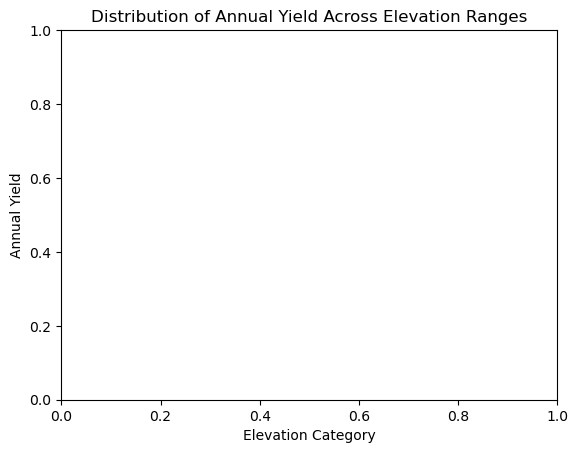

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
def categorize_elevation(elev):
    if elev < 300:
        return "Low"
    elif elev <= 600:
        return "Medium"
    else:
        return "High"
    data['Elevation_category'] = data['Elevation'].apply(categorize_elevation)
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Elevation_Category', y='Annual_Yield', data=data, palette='Set2')
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')
plt.show()


In [ ]:
unique_crops = data['Crop_type'].unique()
def sum_crop_lengths(crops):
    if len(crops) == 0:
        return 0
    return len(crops[0]) + sum_crop_lengths(crops[1:])
total_sum = sum_crop_lengths(list(unique_crops))
print("Total sum of crop type lengths:", total_sum)

Total sum of crop type lengths: 42


In [ ]:
import pandas as pd
from scipy import stats
data = pd.read_csv("MD_agric_exam-4313 (1).csv")
coffee = data.loc[data['Crop_type'].str.lower() == 'coffee', 'Annual_yield']
banana = data.loc[data['Crop_type'].str.lower() == 'banana', 'Annual_yield']
t_stat, p_value = stats.ttest_ind(coffee, banana, equal_var=False, nan_policy='omit')
print("P-value:", round(p_value, 3))

P-value: 0.598
